In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import operator
%matplotlib inline

In [90]:
df = pd.read_csv("C:/Users/sparsha/Documents/SEM 5/DA Project/zomato/zomato.csv")

In [35]:
to_drop = ['url',
           'phone',
           'address',
           'dish_liked',
           'reviews_list',
           'menu_item',
           'listed_in(city)',
           'votes']
df.drop(to_drop, inplace=True, axis=1)
print(df.columns.values)

['name' 'online_order' 'book_table' 'rate' 'location' 'rest_type'
 'cuisines' 'approx_cost(for two people)' 'listed_in(type)']


In [36]:
#remove all , in the approx_cost(for two people) column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x:x.replace(',',''))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)
df

,name,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1/5,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8/5,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8/5,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet
5,Timepass Dinner,Yes,No,3.8/5,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet
7,Onesta,Yes,Yes,4.6/5,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600.0,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,Banashankari,Cafe,"Cafe, Italian, Continental",700.0,Cafes
9,Smacznego,Yes,No,4.2/5,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550.0,Cafes


In [37]:
#convert all num/5 from rating to just num
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x:x.split('/')[0])
# Dealing with instanced with 'NEW'
df['rate'] = df['rate'].apply(lambda x: x.replace('NEW', str(np.nan)))
df['rate'] = df['rate'].apply(lambda x: x.replace('-', str(np.nan)))
df['rate'] = df['rate'].astype(float)

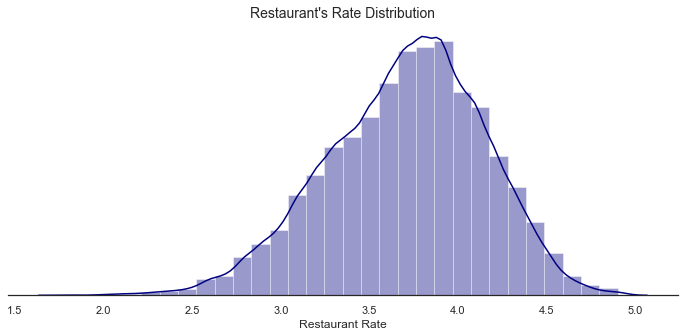

In [38]:
bangalore_rest = df.copy()
sns.set(style='white', palette='muted', color_codes=True)
fig, ax = plt.subplots(figsize=(12, 5))
sns.despine(left=True)
sns.distplot(bangalore_rest['rate'], bins=30, color='navy')
ax.set_title("Restaurant's Rate Distribution", size=14)
ax.set_xlabel('Restaurant Rate')
plt.setp(ax, yticks=[])
plt.show()

In [42]:
bangalore_rest = df.copy()
bangalore_rest.isnull().sum()

#Need to handle missing data
#As there are a lot missing values for column rate we cannot drop it.
#we propose a solution by predicting the rating of these missing values by using KNN
#This is a temprovary solution based on the performance final approach might change


name                               0
online_order                       0
book_table                         0
rate                           10052
location                          21
rest_type                        227
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
dtype: int64

In [50]:
#Too many cusines group them based on the frequency of the cusines as a whole
#If there are multiple cuisines are present pick 2 with most frequency
all_cuisines = dict()
for j in bangalore_rest['cuisines']:
    for i in str(j).split(','):
        i = i.strip()
        if i not in all_cuisines:
            all_cuisines[i] = 1
        else:
            all_cuisines[i] = all_cuisines[i] + 1
#print(sorted(popular_cusines.items(), key=operator.itemgetter(1))[::-1])
#drop all cuisines with less than 500 frequency

cuisines_todel = []
for i in all_cuisines:
    if all_cuisines[i] < 500:
        cuisines_todel.append(i)

for i in bangalore_rest:
    print(i)

name
online_order
book_table
rate
location
rest_type
cuisines
approx_cost(for two people)
listed_in(type)


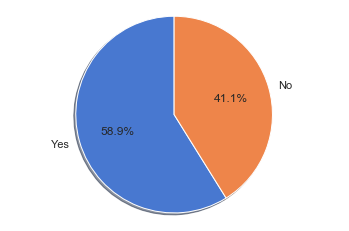

In [51]:
#visualising online_order and book_table data
labels = ['Yes','No']
values = [list(bangalore_rest['online_order']).count('Yes'), list(bangalore_rest['online_order']).count('No')]
fig1, ax1 = plt.subplots()
explode = [0,0]
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

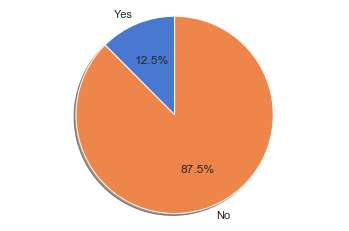

In [52]:
labels = ['Yes','No']
values = [list(bangalore_rest['book_table']).count('Yes'), list(bangalore_rest['book_table']).count('No')]
fig1, ax1 = plt.subplots()
explode = [0,0]
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

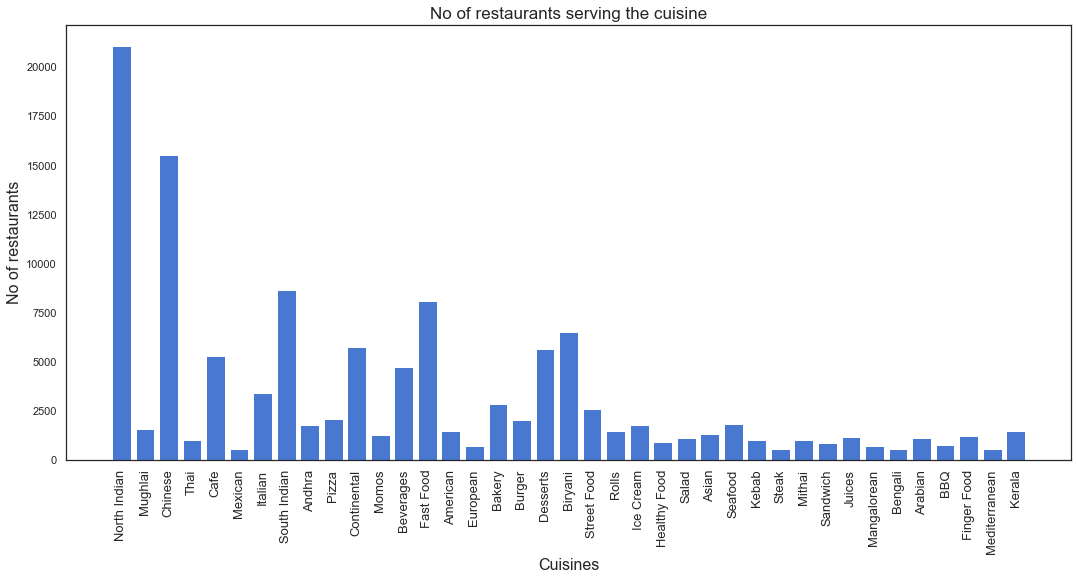

In [87]:
#plot bar charts top cuisines 
popular_cuisines = all_cuisines.copy()
labels = []
freq = [] 
for i in cuisines_todel:
    del popular_cuisines[i]
#popular_cuisines contains all the cuisines which have frequency > 500

fig, ax = plt.subplots(figsize=(18, 8))
plt.bar(range(len(popular_cuisines)), list(popular_cuisines.values()))
plt.xticks(range(len(popular_cuisines)), list(popular_cuisines.keys()),fontsize=13, rotation=90)
plt.xlabel('Cuisines', fontsize=16)
plt.ylabel('No of restaurants', fontsize=16)
plt.title('No of restaurants serving the cuisine',fontsize=17)
plt.show()


{'Casual Dining': 13057, 'Cafe': 5074, 'Quick Bites': 20639, 'Delivery': 4641, 'Mess': 274, 'Dessert Parlor': 3211, 'Bakery': 1998, 'Pub': 950, 'Takeaway': 2157, 'Fine Dining': 405, 'Beverage Shop': 1471, 'Sweet Shop': 745, 'Bar': 2457, 'Confectionery': 47, 'Kiosk': 192, 'Food Truck': 84, 'Microbrewery': 390, 'Lounge': 555, 'Food Court': 765, 'nan': 227, 'Dhaba': 40, 'Club': 41, 'Irani Cafee': 15, 'Bhojanalya': 3, 'Pop Up': 2, 'Meat Shop': 4}


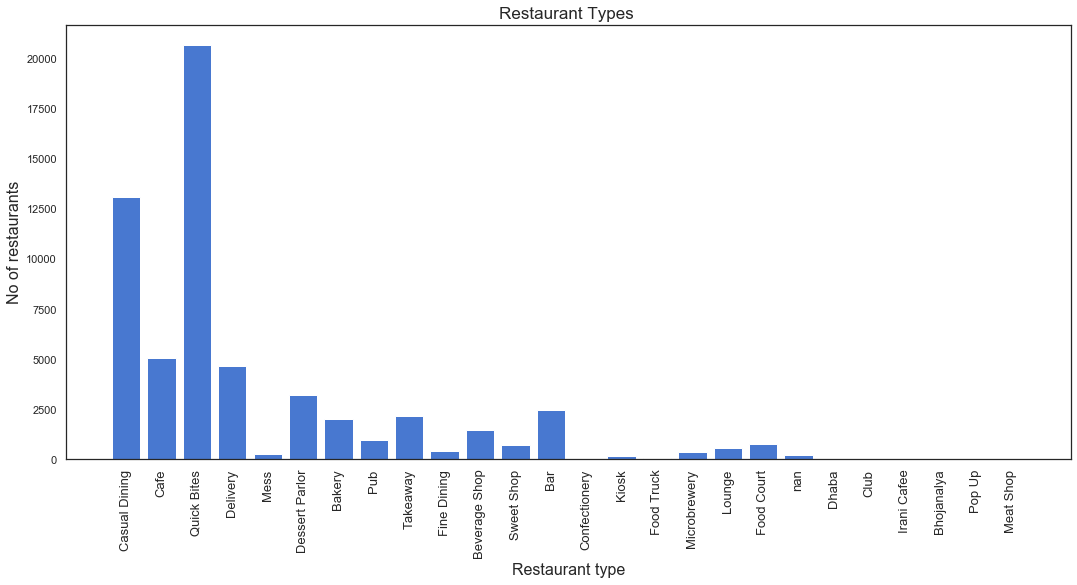

In [89]:
#bar graph for restaurant type
all_types = dict()
for j in bangalore_rest['rest_type']:
    for i in str(j).split(','):
        i = i.strip()
        if i not in all_types:
            all_types[i] = 1
        else:
            all_types[i] = all_types[i] + 1
#print(all_types)
#all_types contains all the types of restaurants available
fig, ax = plt.subplots(figsize=(18, 8))
plt.bar(range(len(all_types)), list(all_types.values()))
plt.xticks(range(len(all_types)), list(all_types.keys()),fontsize=13, rotation=90)
plt.xlabel('Restaurant type', fontsize=16)
plt.ylabel('No of restaurants', fontsize=16)
plt.title('Restaurant Types ',fontsize=17)
plt.show()

#check if we want to set a threshold for this. 
#need to handle missing data

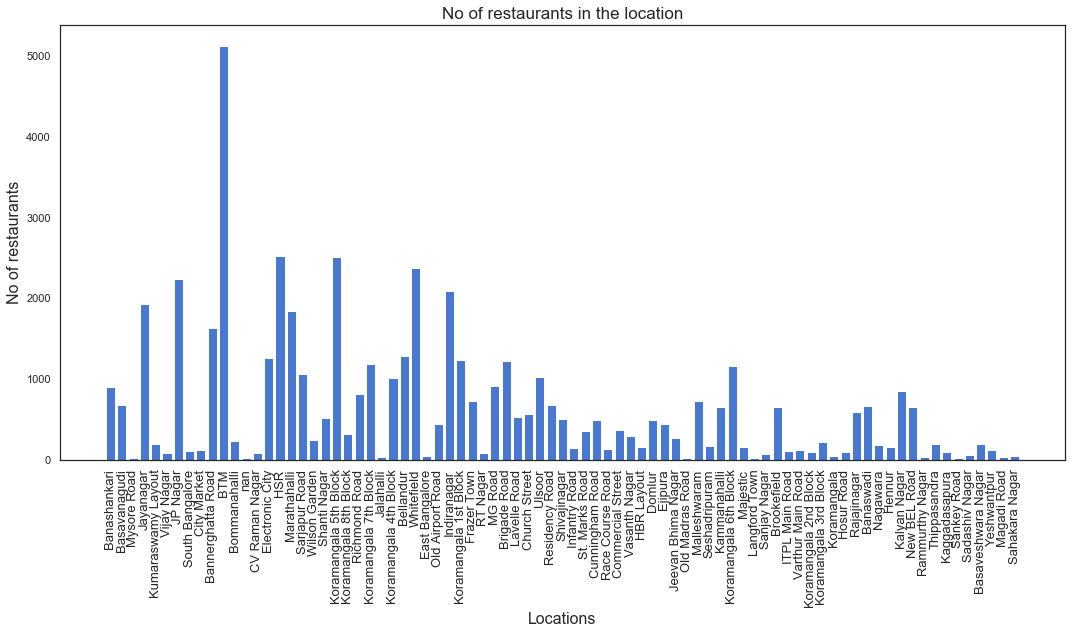

In [99]:
#bar graph for location

all_loc = dict()
for j in bangalore_rest['location']:
    for i in str(j).split(','):
        i = i.strip()
        if i not in all_loc:
            all_loc[i] = 1
        else:
            all_loc[i] = all_loc[i] + 1

#Set the popular threshold. Here the Threshoold is 20
popular_loc = all_loc.copy()
for i in all_loc:
    if(all_loc[i] < 20):
        del popular_loc[i]

#Also handle missing data
fig, ax = plt.subplots(figsize=(18, 8))
plt.bar(range(len(popular_loc)), list(popular_loc.values()))
plt.xticks(range(len(popular_loc)), list(popular_loc.keys()),fontsize=13, rotation=90)
plt.xlabel('Locations', fontsize=16)
plt.ylabel('No of restaurants', fontsize=16)
plt.title('No of restaurants in the location',fontsize=17)
plt.show()
